### Q1. Perform Exploratory Data Analysis (EDA) tasks

<br>a) Visualize the 10 random rows of the data set
<br>b) Generate the description for numeric variables
<br>c) Check the shape of the data set
<br>d) Generate the correlation matrix
<br>e) Generate a correlogram

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [129]:
df=pd.read_csv("admission.csv")

In [130]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [131]:
df1=pd.DataFrame(df.sample(10))

<Axes: >

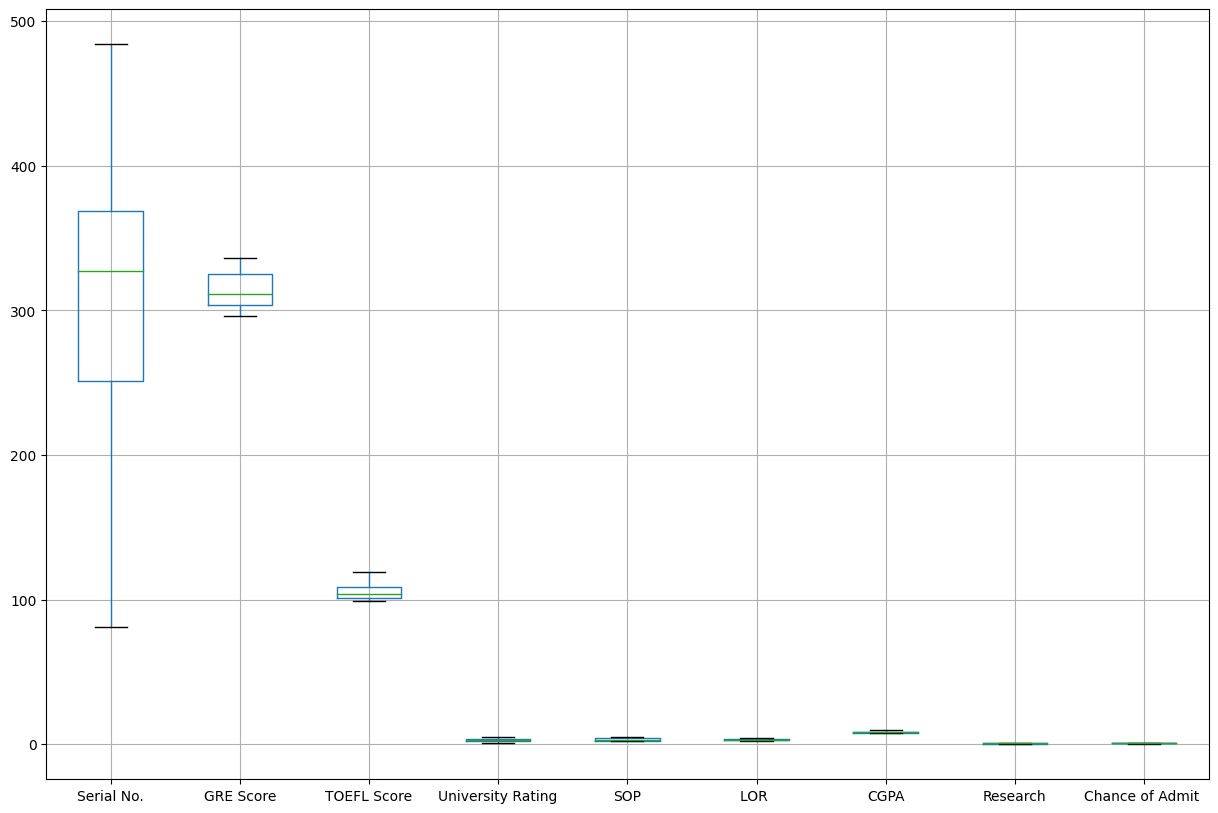

In [132]:
plt.figure(figsize=(15,10))
df1.boxplot()

array([[<Axes: title={'center': 'TOEFL Score'}>]], dtype=object)

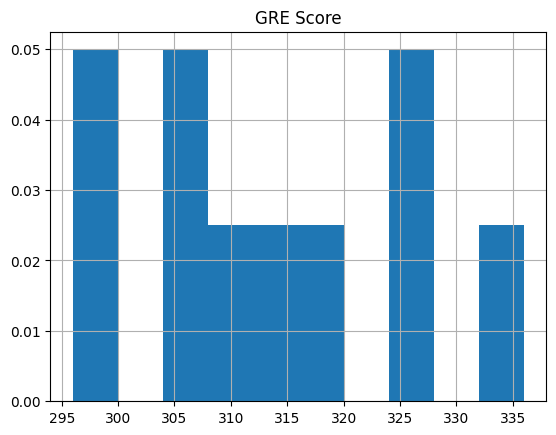

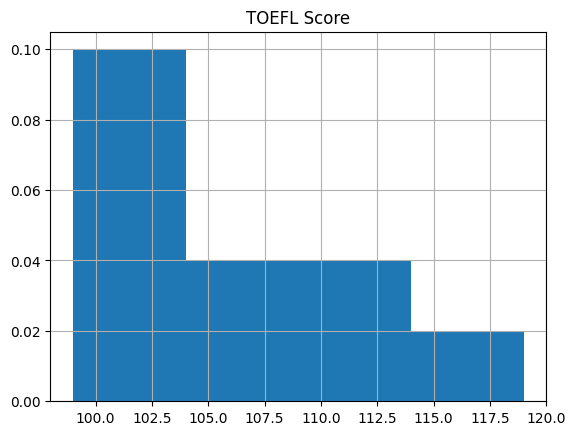

In [133]:
df1.hist('GRE Score',density=True)
df1.hist('TOEFL Score',bins=4,density=True)

<Axes: xlabel='Chance of Admit ', ylabel='Density'>

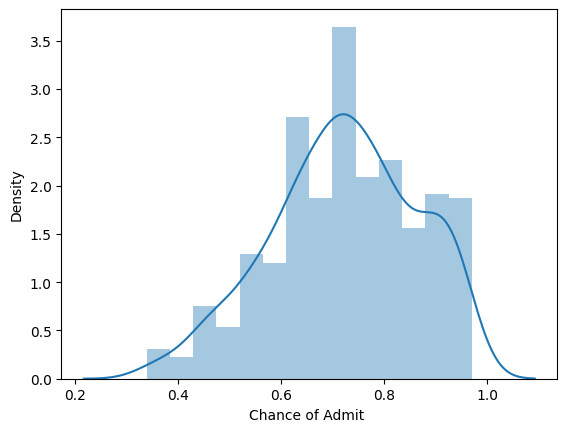

In [136]:
sns.distplot(df['Chance of Admit '],kde=True)

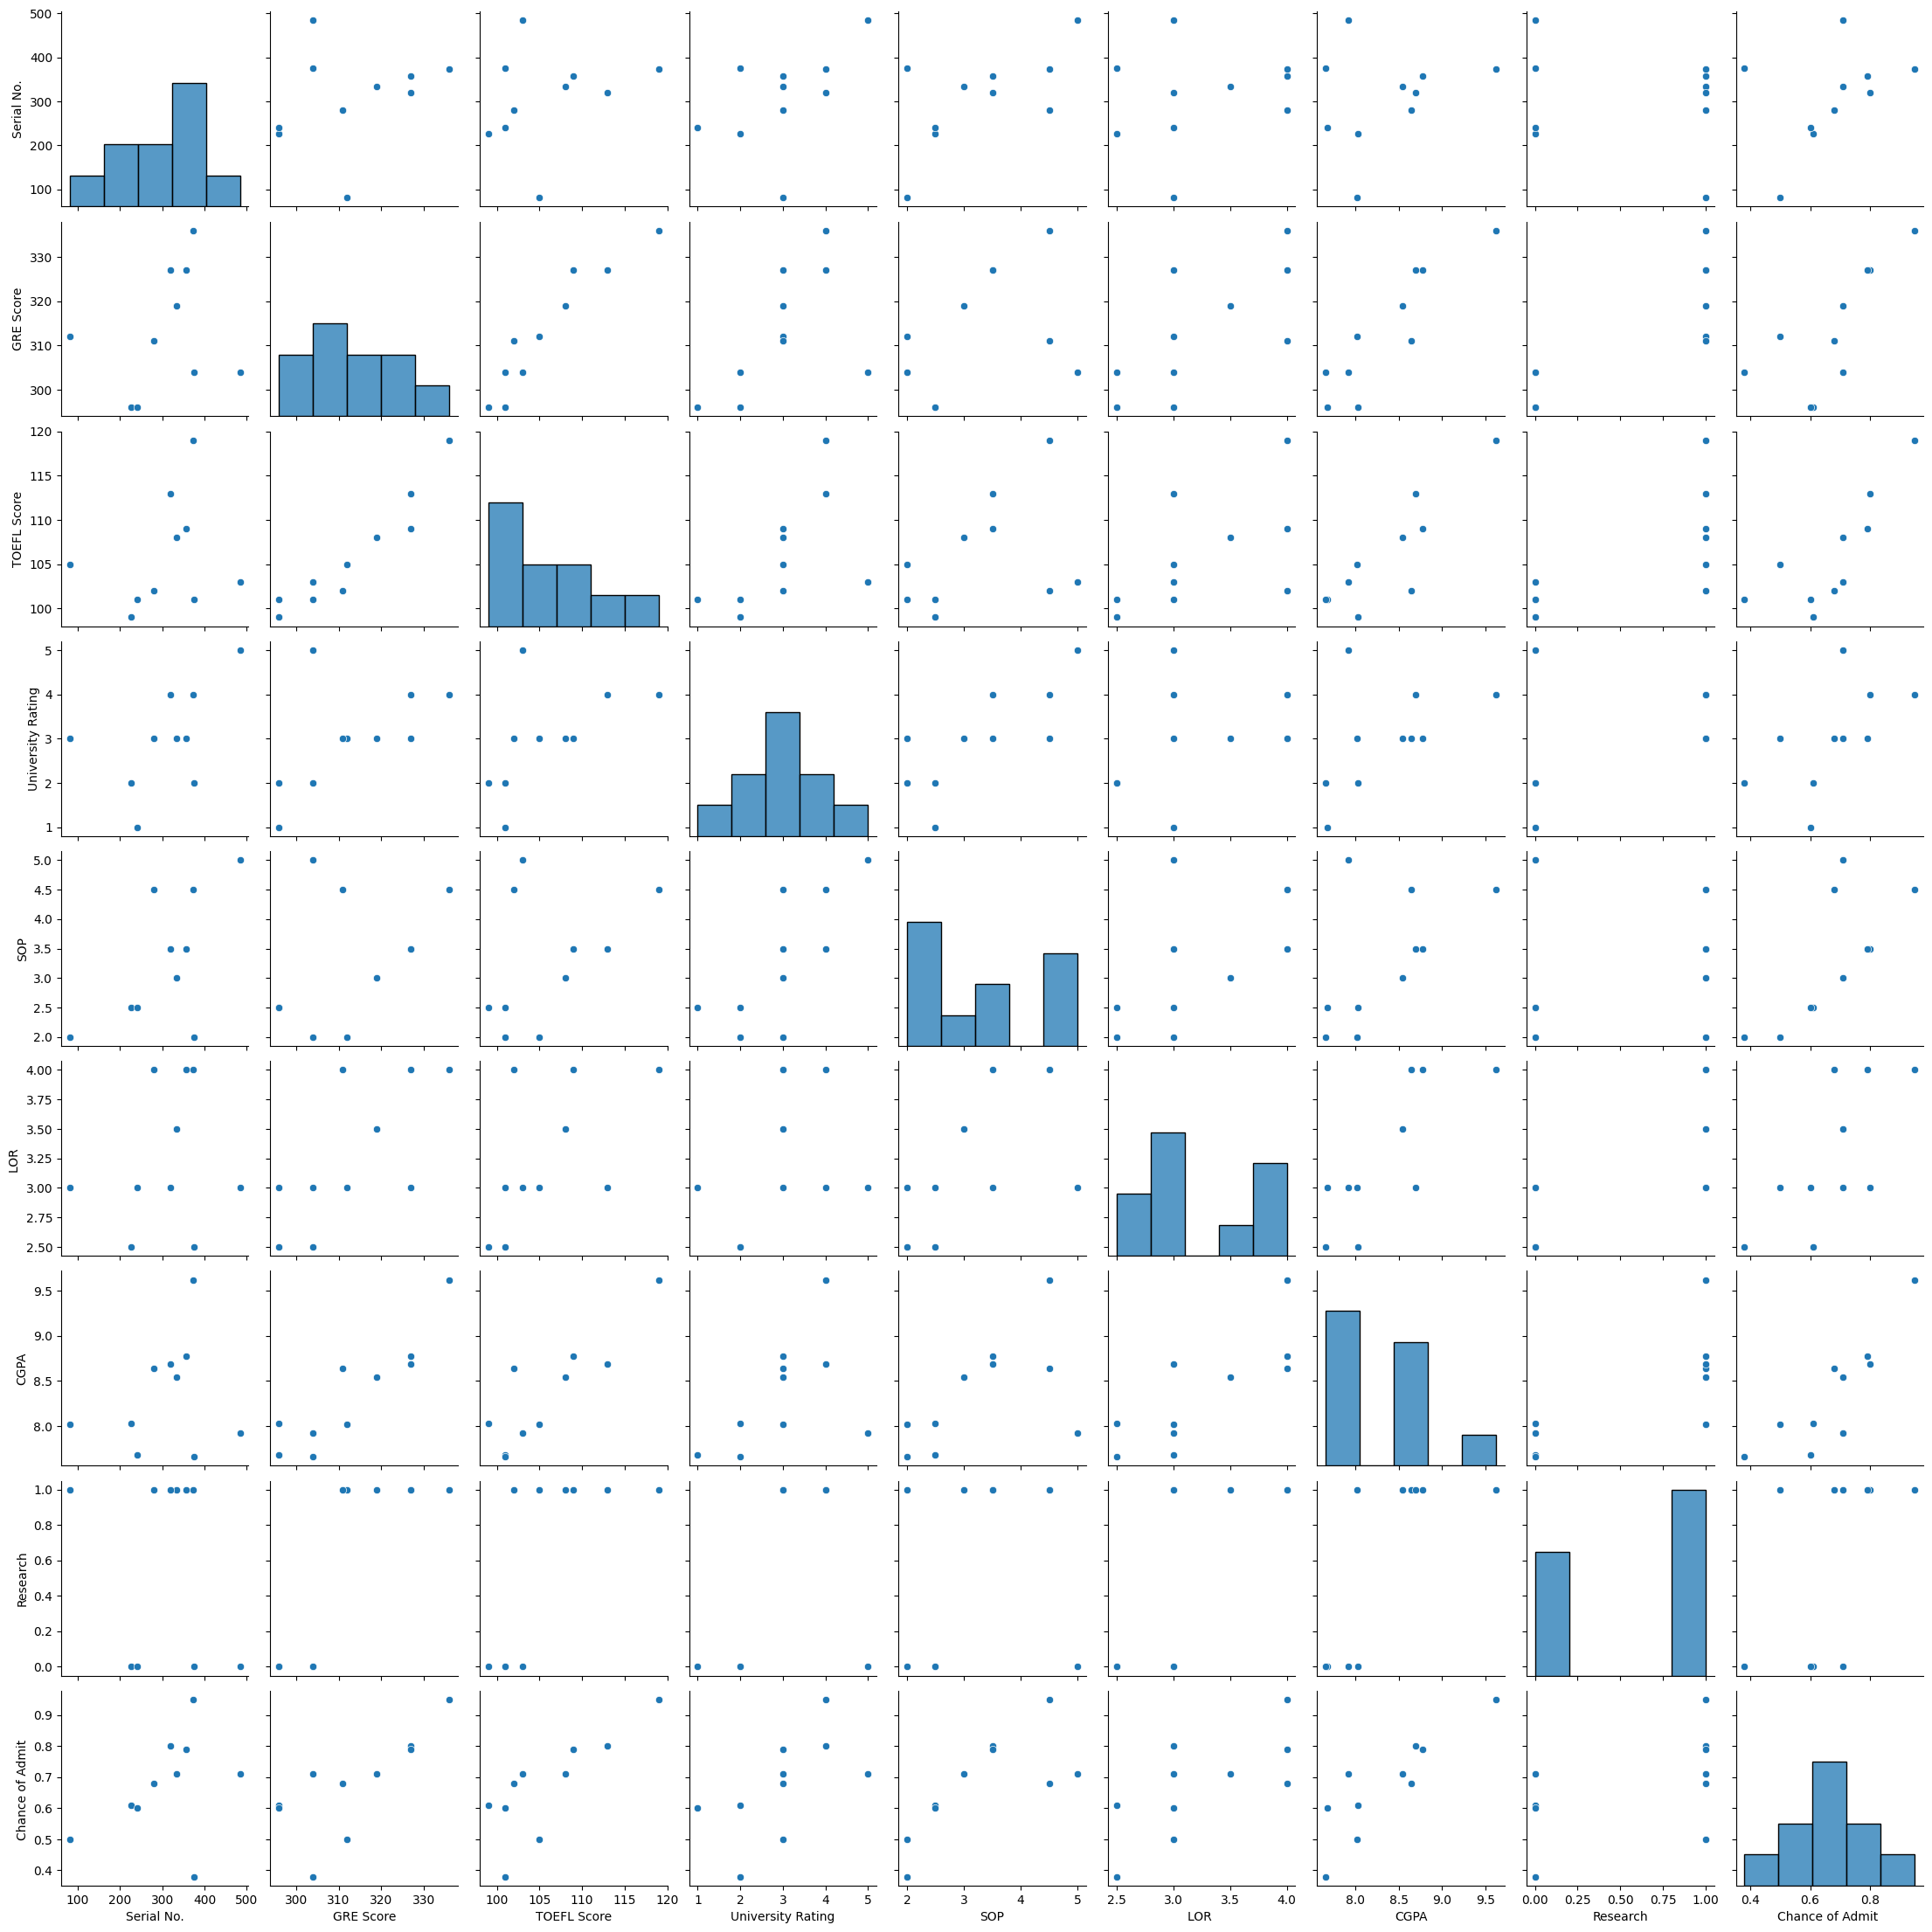

In [137]:
sns.pairplot(df1)

In [138]:
df.shape

(500, 9)

<Axes: >

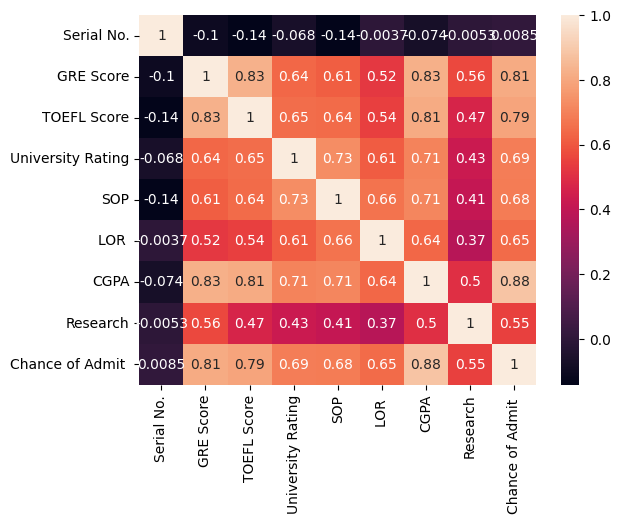

In [139]:
sns.heatmap(df.corr(),annot=True)

### Q.2 Find out the minimum and maximum values for GRE score


In [140]:
print(df['GRE Score'].max())
print(df['GRE Score'].min())


340
290


### Q.3 Find out the percentage of universities for each university rating

In [141]:
Ratings = df['University Rating'].unique().tolist()
for i in Ratings:
  inpercentage = (round(len(df[df['University Rating']==i])/len(df)*100,2))
  print(f"percentage of University of Rating {i} is {inpercentage}")

percentage of University of Rating 4 is 21.0
percentage of University of Rating 3 is 32.4
percentage of University of Rating 2 is 25.2
percentage of University of Rating 5 is 14.6
percentage of University of Rating 1 is 6.8


### Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :
<br>Students having the “Chance of Admit” value &gt; 0.80, are assigned value 1, and
<br>Students having the “Chance of Admit” value &lt; 0.80, are assigned value 0
<br>Where 0: Low chance of Admission and 1: High chance of admission

In [142]:
for i in range(len(df['Chance of Admit '])):
  if df['Chance of Admit '][i] > 0.80:
    df['Chance of Admit '] = df['Chance of Admit '].replace({df['Chance of Admit '][i] : 1})
  else:
    df['Chance of Admit '] = df['Chance of Admit '].replace({df['Chance of Admit '][i] : 0})



In [143]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,0.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,1.0
496,497,337,117,5,5.0,5.0,9.87,1,1.0
497,498,330,120,5,4.5,5.0,9.56,1,1.0
498,499,312,103,4,4.0,5.0,8.43,0,0.0


### Q.5 Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.

In [144]:
df.drop('Serial No.',axis=1,inplace=True)

In [145]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,0.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,0.0
4,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1.0
496,337,117,5,5.0,5.0,9.87,1,1.0
497,330,120,5,4.5,5.0,9.56,1,1.0
498,312,103,4,4.0,5.0,8.43,0,0.0


In [154]:
X = df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

In [156]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [199]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {"criterion" : ["gini", "entropy", "log_loss"],
              "splitter" :["best", "random"],
              "max_depth" : [1,2,5,10,12,15,20,25,40,45,50,70,100],
              "max_features": ["auto", "sqrt", "log2"],
              'ccp_alpha': [0.1, 0.01, 0.001]}


Classifier = DecisionTreeClassifier()
clf = GridSearchCV(estimator=Classifier,param_grid=parameters,cv=5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 5, 10, 12, 15, 20, 25, 40, 45, 50,
                                       70, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [200]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01, criterion='log_loss', max_depth=15,
                       max_features='auto')

In [201]:
clf.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'log_loss',
 'max_depth': 15,
 'max_features': 'auto',
 'splitter': 'best'}

In [202]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9485714285714286
0.9066666666666666


In [203]:
from sklearn.metrics import classification_report, accuracy_score
Prediction = clf.predict(X_test)
Score = accuracy_score(y_test,Prediction)

In [204]:
Prediction

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])

In [205]:
Score

0.9066666666666666

In [206]:
Report = classification_report(y_test,Prediction)

In [207]:
print(Report)

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94       106
         1.0       0.92      0.75      0.83        44

    accuracy                           0.91       150
   macro avg       0.91      0.86      0.88       150
weighted avg       0.91      0.91      0.90       150

